# Arbre de décision

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
data = pd.read_csv("data/boston.csv")
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
390,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
391,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
392,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


In [8]:
# medv est la variable à prédire (prix des maisons) :
# donnée de test et d'entrainement
X_train, X_test, y_train, y_test = train_test_split(data.drop('MEDV', axis=1), data['MEDV'], test_size=0.33, random_state=0)

{"X_train": X_train.shape, "X_test": X_test.shape, "y_train": y_train.shape, "y_test": y_test.shape}

{'X_train': (263, 13),
 'X_test': (131, 13),
 'y_train': (263,),
 'y_test': (131,)}

In [9]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8250376577436178

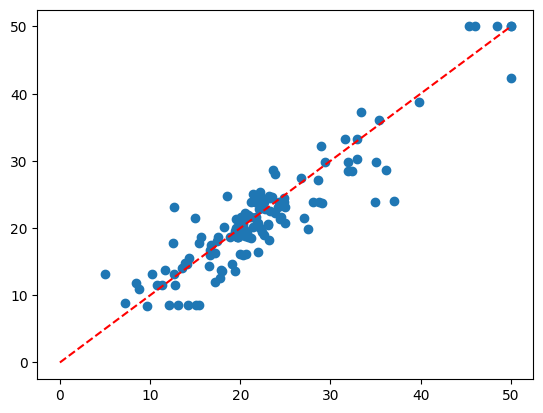

In [10]:
# Ypred 
y_pred = model.predict(X_test)

# show 
plt.scatter(y_test, y_pred)
plt.plot([0, 50], [0, 50], '--r')

In [11]:
model.feature_importances_

importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

# les valeurs les plus importants sont celle les plus proches de 1
# RM 

,importance
feature,
RM,0.618
LSTAT,0.223
CRIM,0.066
B,0.027
DIS,0.026
PTRATIO,0.009
INDUS,0.008
TAX,0.008
NOX,0.006


# Avec un random forest 

In [12]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8687818951151617

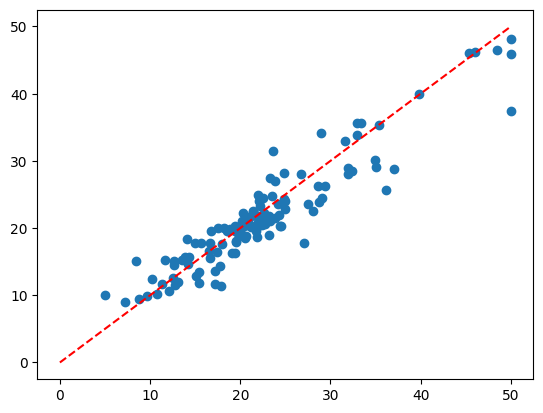

In [13]:
# y_pred
y_pred = model.predict(X_test)

# show
plt.scatter(y_test, y_pred)
plt.plot([0, 50], [0, 50], '--r')
